## **Performance Metrics to evaluate text generating LLMs:**

- **Sentiment Analysis**

In this notebook, we essentially focus on the Sentiment Analysis performance metric (more about this on the readme.md file).

In [5]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00


In [17]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import random
import matplotlib.pyplot as plt
import os

In [7]:
# Load the IMDb dataset from Hugging Face datasets
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [8]:
# Select a subset of reviews and their labels
random_indices = random.sample(range(len(dataset['train'])), 10)
random_reviews = [dataset['train'][i]['text'] for i in random_indices]
random_labels = [dataset['train'][i]['label'] for i in random_indices]

# Convert label indices to actual labels
label_mapping = {
    0: 'Negative',
    1: 'Positive',
}
random_labels = [label_mapping[label] for label in random_labels]

In [9]:
df = pd.DataFrame({'Review': random_reviews, 'Ground_Truth_Label': random_labels})

### **From here: re-execute the code for the different Text Generative Models:**

In [10]:
testing_array = df['Review'].values
print(testing_array)
print(len(testing_array))

['It is ironic that during the \'50s, when Douglas Sirk was at his most successful in terms of audience appeal, he was virtually ignored by the critics\x85 He is now seen, however, as a director of formidable intellect who achieved his best work in melodrama\x85<br /><br />"Written on the Wind" is about the downfall of a Texan oil dynasty surrounded by worthless reputation, alcoholism, and nymphomania\x85 It is about the twisted, fatal connections between sex, power, and money...<br /><br />Stack draws a compelling portrait of a tormented drunken destroyed by frustration, arrogance, jealousy, insanity, and some deep insecurities\x85<br /><br />Dorothy Malone succeeds as an attractive woman with an excessive sexual appetites, degrading herself for Hudson and to other fellows in town\x85 Her best line: "I\'m filthy." In one frantic scene, we see her shaking, quivering and sweating to a provocative mambo\x85 In another weeping alone over a model oil-derrick at her father\'s desk\x97symbol

**Query the text generating llm with the following prompt:** (copy the document as mentionned: PASTE_DOCUMENTS_HERE)

```
Please classify the following 10 sentences: positive, negative. Here are the sentences: PASTE_SENTENCES_HERE. please return the answers as an array
```

In [11]:
# Add the result
predicted_labels = ['Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']

predicted_labels_chat_gpt = ["Positive", "Negative", "Negative", "Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative" ]

predicted_labels_gemini = ["Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Positive", "Negative"]

predicted_labels_mistral = ["Positive", "Negative", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Negative"]

predicted_labels_llama = ["Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative"]

In [12]:
def evaluate_predictions(df, predicted_labels):
    # Add predicted labels to the DataFrame
    df['Predicted_Labels'] = predicted_labels

    # Calculate accuracy
    correct_predictions = sum(df['Ground_Truth_Label'] == df['Predicted_Labels'])
    total_reviews = len(df)
    accuracy = correct_predictions / total_reviews

    # Determine grade based on accuracy
    if accuracy >= 0.9:
        grade = 'A'
    elif accuracy >= 0.8:
        grade = 'B'
    elif accuracy >= 0.7:
        grade = 'C'
    elif accuracy >= 0.6:
        grade = 'D'
    else:
        grade = 'F'

    # Print results
    print("Total Score:", accuracy)
    print("Grade:", grade)
    print("\nDataFrame with 10 random reviews:")
    print(df.head(10))  # Print the first 10 rows of the DataFrame

    return accuracy

In [14]:
# Define predicted labels for each model
predicted_labels_all = [predicted_labels_chat_gpt, predicted_labels_gemini, predicted_labels_mistral, predicted_labels_llama]

# Define model names and sentiment accuracies
model_names = ["Chat GPT", "Gemini", "Mistral", "Llama"]

accuracies = []
# Iterate over each model and evaluate predictions
for model_name, predicted_labels in zip(model_names, predicted_labels_all):
    print(f"Evaluating {model_name} predictions:")
    accuracies.append(evaluate_predictions(df.copy(), predicted_labels))
    print()

Evaluating Chat GPT predictions:
Total Score: 0.6
Grade: D

DataFrame with 10 random reviews:
                                              Review Ground_Truth_Label  \
0  It is ironic that during the '50s, when Dougla...           Positive   
1  I was all ready to pan this episode, seeing th...           Positive   
2  It' just funny, watch it!!! <br /><br />OK the...           Positive   
3  I saw this film when it was originally release...           Positive   
4  "Nada" was the most inadequate follow-up to "L...           Negative   
5  Robert De Niro, Cuba Gooding Jr., Hal Holbrook...           Positive   
6  If you're amused by straight-faced goings-on t...           Positive   
7  I don't know why I'm taking the time to review...           Negative   
8  I'm going to spend as much time on this review...           Negative   
9  I don't know why, but for some sick reason, I ...           Negative   

  Predicted_Labels  
0         Positive  
1         Negative  
2         Negativ

In [23]:
def save_scores(model_names, scores):
      # Create the "Outputs/2" folder if it doesn't exist
    output_folder = os.path.join("Outputs", "2")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    combined_df = pd.DataFrame(columns=["model_name", "score"])

    for model_name, score in zip(model_names, scores):
        # Create DataFrame for individual model scores
        new_data = {
            'model_name': [model_name],
            'score': [score]
        }
        new_df = pd.DataFrame(new_data)

        # Save the DataFrame to a CSV file in the "Outputs/2" folder
        output_filename = f"{model_name.lower().replace(' ', '_')}.csv"
        output_path = os.path.join(output_folder, output_filename)
        new_df.to_csv(output_path, index=False)

        # Append to the combined DataFrame
        combined_df = pd.concat([combined_df, new_df], ignore_index=True)

    # Save the combined DataFrame to a CSV file in the "Outputs/2" folder
    combined_output_filename = "Combined.csv"
    combined_output_path = os.path.join(output_folder, combined_output_filename)
    combined_df.to_csv(combined_output_path, index=False)

In [24]:
save_scores(model_names, accuracies)

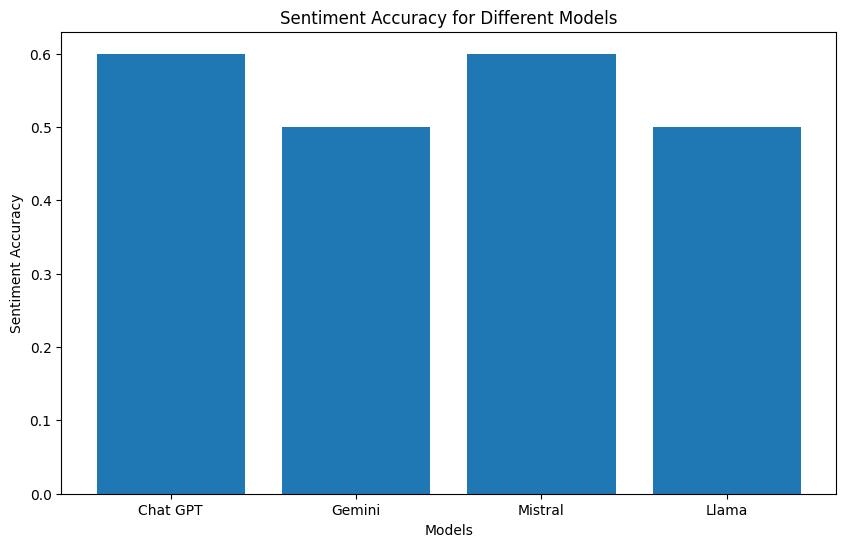

<Figure size 640x480 with 0 Axes>

In [25]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Sentiment Accuracy')
plt.title('Sentiment Accuracy for Different Models')

# Show plot
plt.show()

# Save plot
output_folder = os.path.join("Outputs", "2")
plot_output_path = os.path.join(output_folder, "Output.png")
plt.savefig(plot_output_path)

In [ ]:
# Create a DataFrame with model names and sentiment accuracies
data = {'model_name': model_names, 'Sentiment Accuracy': accuracies}
df_all = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_filename = "sentiment_accuracies_all.csv"
df_all.to_csv(output_filename, index=False)
